In [1]:
import sys,numpy as np
import tensorflow as tf
import PIL

sys.path.insert(0, "/home/wei/data/code/hongyi-demo/20231008")
from eval_patch import PatchPreds

2023-10-08 16:28:00.978917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-08 16:28:01.653183: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# load tf model

In [2]:
tf_model = tf.saved_model.load("/home/wei/data/data/model/saved_model/semantic_segment/v2/keras/modelv2_20231006/")

2023-10-08 16:28:03.635421: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9589 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5


# load the patch

In [3]:
p = PatchPreds(width_stride=150, height_stride=150, margin_width=30)

# load an image

In [4]:
ori_image = PIL.Image.open("/home/wei/data/data/jiachenghongyi/semantic_segment/processed/20230917_mark3/content/1C4BJWBG8CL271460.jpg")

label_image = PIL.Image.open("/home/wei/data/data/jiachenghongyi/semantic_segment/processed/20230917_mark3/label/1C4BJWBG8CL271460.png")
label_array = (np.array(label_image) > 0).astype(np.uint8) * 255
label_image = PIL.Image.fromarray(label_array)

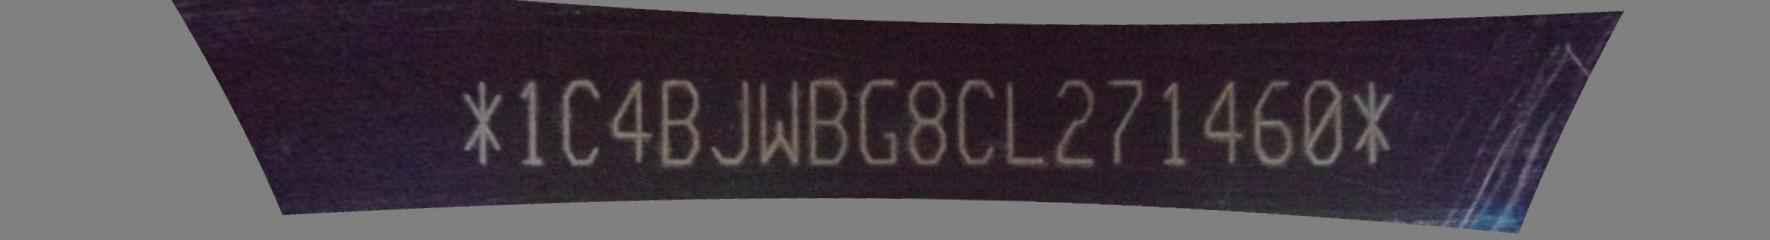

In [5]:
ori_image

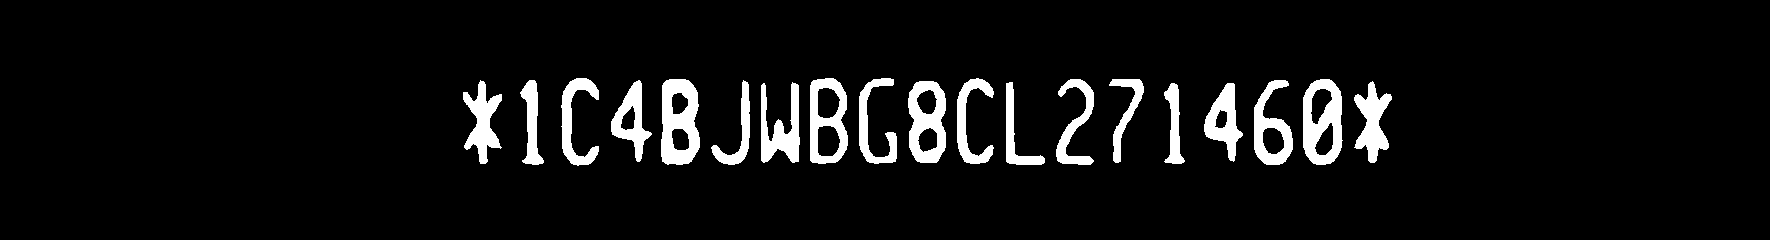

In [6]:
label_image

# Make Prediction

In [12]:
ori_image_array = np.array(ori_image).astype(np.float32)/255.0
preds = p.predict(image=ori_image_array, model=tf_model)

In [14]:
print(ori_image_array.shape)
print(preds.shape)

(240, 1770, 3)
(240, 1770)


In [16]:
print(preds.min())
print(preds.max())
preds

8.439207666022241e-12
0.9999992847442627


array([[2.70405406e-04, 1.43023062e-04, 4.45001991e-04, ...,
        2.18754540e-05, 3.58497418e-05, 3.63876461e-05],
       [2.02901807e-04, 2.10036029e-04, 5.15986700e-04, ...,
        2.71628087e-05, 4.91537867e-05, 3.17875456e-05],
       [1.50297012e-04, 1.03028797e-04, 3.74712195e-04, ...,
        5.03480369e-05, 2.52189493e-05, 2.81979101e-05],
       ...,
       [9.34633936e-05, 6.89780281e-05, 7.81409835e-05, ...,
        2.53431353e-05, 4.01615071e-05, 3.09333118e-05],
       [9.48177403e-05, 9.07837821e-05, 6.88917789e-05, ...,
        8.46096591e-05, 4.55965419e-05, 3.93016344e-05],
       [9.74858922e-05, 7.89840124e-05, 8.75939149e-05, ...,
        1.20771540e-04, 8.47626070e-05, 5.66105482e-05]])

In [19]:
preds = (preds > 0.5).astype(np.uint8) * 255
preds_img = PIL.Image.fromarray(preds)

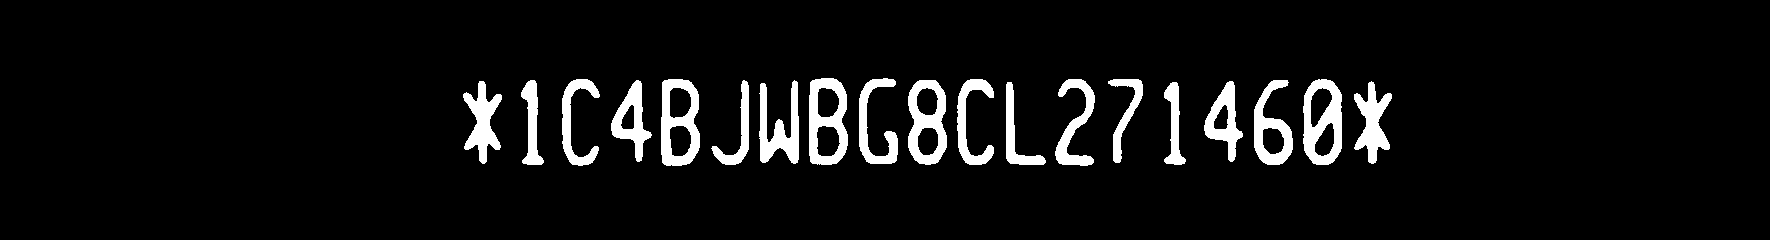

In [20]:
preds_img